# **Pre_Pocessing**

In [ ]:
#Transform in float32 to become these datas more computationally cheap
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
#See the label values
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"y_train label {value}: have {count} times")

y_train label 0: have 4027 times
y_train label 1: have 4021 times
y_train label 2: have 3970 times
y_train label 3: have 3977 times
y_train label 4: have 4067 times
y_train label 5: have 3985 times
y_train label 6: have 4004 times
y_train label 7: have 4006 times
y_train label 8: have 3983 times
y_train label 9: have 3960 times


In [ ]:
#Create a def to encoding the y datasets
def encoding(x, cat):
  x = tf.keras.utils.to_categorical(x, cat)
  return x

y_train = encoding(y_train, 10)
y_test = encoding(y_test, 10)
y_val = encoding(y_val, 10)

In [ ]:
#Normalizate the train database
def normalization(var):
  var_norm = var / 255.0
  return var_norm

In [ ]:
x_train_norm = normalization(x_train)
x_test_norm = normalization(x_test)
x_val_norm = normalization(x_val)

In [ ]:
#Transform in grayscale
def grayscale(x):
  x= np.sum(x / 3, axis=3, keepdims=True)
  return x

x_train_norm_gray = grayscale(x_train_norm)
x_test_norm_gray = grayscale(x_test_norm)
x_val_norm_gray = grayscale(x_val_norm)

In [ ]:
y_train.shape

(40000, 10)

In [ ]:
x_train_norm_gray.shape

(40000, 32, 32, 1)

In [ ]:
x_train_norm.shape

(40000, 32, 32, 3)

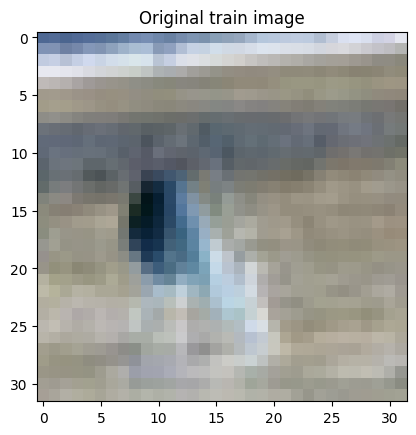

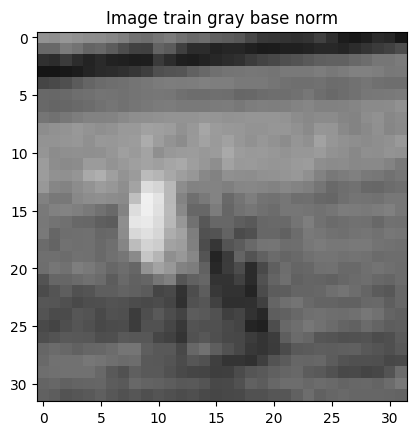

In [ ]:
i = np.random.randint(0, 40000)

# Visualize the original image
plt.figure()
plt.title("Original train image")
plt.imshow((x_train[i] * 255).astype(np.uint8))
# Visualize the normalized grayscale version
plt.figure()
plt.title("Image train gray base norm")
plt.imshow(x_train_norm_gray[i].squeeze(), cmap='gray', vmin=0, vmax=1)



In [ ]:
x_train_norm.shape

(40000, 32, 32, 3)

Text(0.5, 1.0, 'Norm Norse Image')

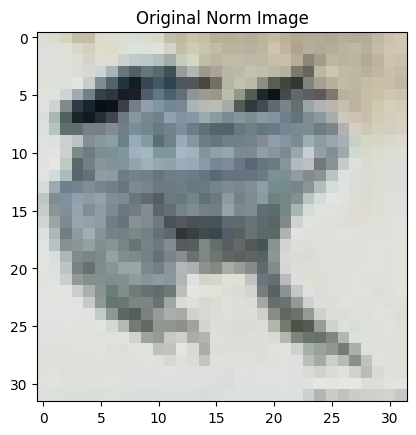

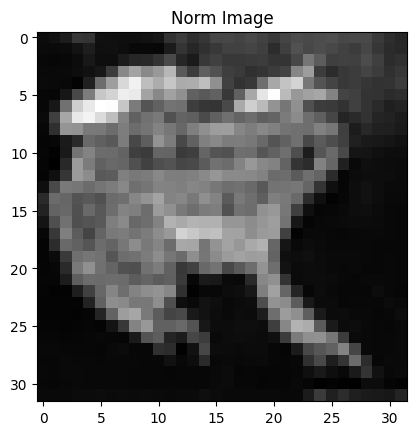

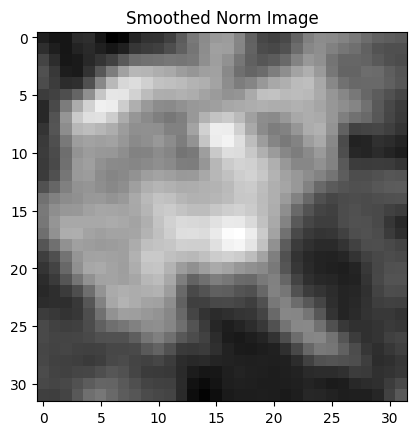

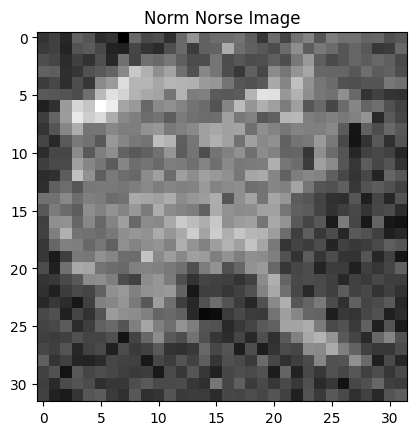

In [ ]:
#Noise random
from scipy.ndimage import gaussian_filter

#Create a def to noise random
def random_noise(x):
  return x + 0.1 * np.random.normal(size=x.shape)

x_train_norm_gray_noise = random_noise(x_train_norm_gray)
x_val_norm_gray_noise = random_noise(x_val_norm_gray)


#Create a def to gaussian_filter
def gaussian_filter_smoothad(x, sigma):
  x = gaussian_filter(x, sigma=sigma)
  return x

x_train_norm_gray_noise_smoothed = gaussian_filter_smoothad(x_train_norm_gray_noise, 1)
x_val_norm_gray_noise_smoothed = gaussian_filter_smoothad(x_val_norm_gray_noise, 1)

# Plot the original, norm, smoothed and noise images for comparison
plt.figure()
plt.imshow((x_train[0] * 255).astype(np.uint8))
plt.title('Original Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray[0], cmap='gray')
plt.title('Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray_noise_smoothed[0], cmap='gray')
plt.title('Smoothed Norm Image')

plt.figure()
plt.imshow(x_train_norm_gray_noise[0], cmap='gray')
plt.title('Norm Norse Image')

Text(0.5, 1.0, 'Norm Norse Image')

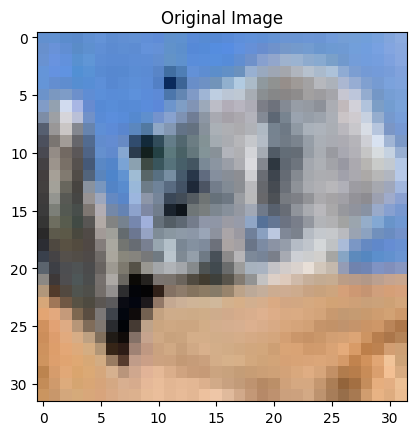

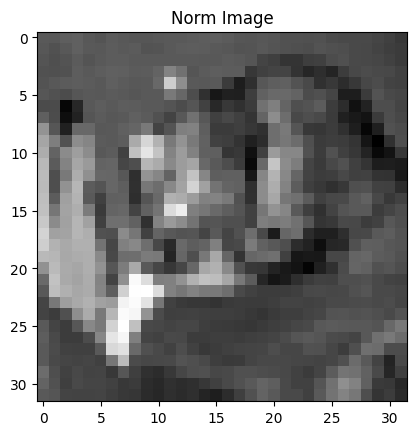

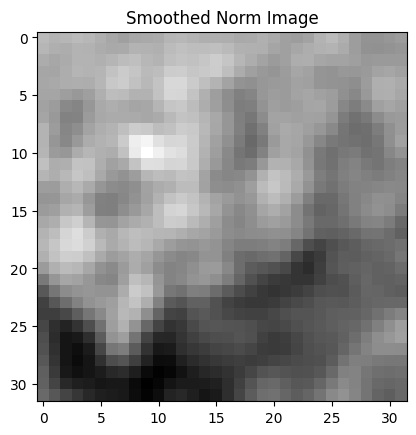

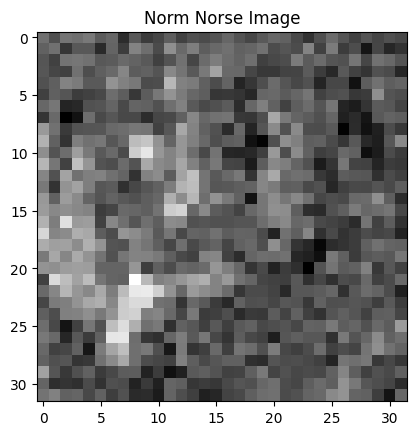

In [ ]:
#See these images in the x_test varaible
from scipy.ndimage import gaussian_filter
x_test_norm_gray_noise = x_test_norm_gray + 0.1 * np.random.normal(size=x_test_norm_gray.shape)

sigma = 1
x_test_norm_gray_noise_smoothed = gaussian_filter(x_test_norm_gray_noise, sigma=sigma)

# Plot the original, norm, smoothed and noise images for comparison
plt.figure()
plt.imshow((x_test[0] * 255).astype(np.uint8))
plt.title('Original Image')

plt.figure()
plt.imshow(x_test_norm_gray[0], cmap='gray')
plt.title('Norm Image')

plt.figure()
plt.imshow(x_test_norm_gray_noise_smoothed[0], cmap='gray')
plt.title('Smoothed Norm Image')

plt.figure()
plt.imshow(x_test_norm_gray_noise[0], cmap='gray')
plt.title('Norm Norse Image')